# עבודה חלק שני
מגישים:אורי ביטון-213868797
דניאל גולדשמיד-209328244
https://github.com/danielgold1997/part1

In [12]:
import pandas as pd
def prepare_data(dataset: pd.DataFrame) -> pd.DataFrame:

    #ייבוא כל הספריות הדרושות
    #####################################################################################
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    import seaborn as sns
    from scipy.stats import chi2_contingency
    from scipy import stats
    import warnings

    # הורדת כל האזהרות
    warnings.filterwarnings('ignore')
    ####################################################################################
    df=dataset
    #הורדת כפילויות
    df.loc[df.duplicated()]
    dataset = df.drop_duplicates().copy()
    
    #####################################################################################
    #פונקציות סידור כלליות
    ################
    #פונקציה לסידור כל הערכים החסרים לכדי ערך אחד בלבד
    for i in range(len(dataset)):
        for j in range(len(df.columns)):        
            if dataset.iloc[i,j]==None:
                dataset.iloc[i,j]=np.nan
            if dataset.iloc[i,j]=='לא מוגדר':
                dataset.iloc[i,j]=np.nan
            if dataset.iloc[i,j]=='None':
                dataset.iloc[i,j]=np.nan
    

    #סידור היצרן של לקסוס לעברית בלבד
    for i in range(len(dataset)):
        if dataset.iloc[i,0]=='Lexsus': 
            dataset.iloc[i,0]='לקסוס'
    
    #הורדת הרווחים המיותרים שיש לנו בדגמים מסויימים
    dataset['model'] = dataset['model'].apply(lambda x: x.lstrip() if x.startswith(' ') else x)
    #הורדת המילה חדשה או חדש מהדגמים שיש בהם את המילה הזאת מהסיבה שאנו רוצים מודל משותף 
    for i in range(len(dataset)):
        if "החדשה" in dataset.iloc[i, 2] or "חדשה" in dataset.iloc[i, 2]:
            try:
                s = dataset.iloc[i, 2].split()
                dataset.iloc[i, 2] = " ".join(s[:-1])
            except:
                continue
    

   

    
    #הורדת המילה של היצרן מכל ערך בדגם שיש לו את זה
    for i in range(len(dataset)):
        if dataset.iloc[i,0] in dataset.iloc[i,2]:
            dataset.iloc[i,2]= dataset.iloc[i,2].replace(dataset.iloc[i,0], '')
    #####################################################################################
    #סידור ערכים ספציפים לא תואמים של דגמים לפי כל יצרן
    #######################################
    #honda
    # Define a function to replace entire values
    def replace_if_contains(value, substring, replacement):
        return replacement if substring in value else value

    # Apply the function to the DataFrame
    dataset['model'] = dataset['model'].apply(replace_if_contains, args=('סיוויק', 'CIVIC'))
    dataset['model'] = np.where(np.isin(dataset['model'], ["JAZZ", "ג'אז", 'ג`אז']), 'JAZZ', dataset['model'])
    dataset['model'] = np.where(np.isin(dataset['model'], ['אקורד']), 'ACCORD', dataset['model'])
    
    #בדיקה שאכן שונה
    dataset[dataset['manufactor']=='הונדה'].iloc[:,2].unique()
    
    
    #skoda
    lst=[]
    lily=[]
    for i in range(len(dataset)):
        if dataset.iloc[i,0]=='סקודה':

            s=dataset.iloc[i,2].split()
            if len(s) >1:

                    dataset.iloc[i,2]=s[0]
    #בדיקה שאכן שונה
    A=dataset[dataset['manufactor']=='סקודה'].iloc[:,2].unique()
    A=A.tolist()
    
    #רנו
    A=dataset[dataset['manufactor']=='רנו'].iloc[:,2].unique()
    A=A.tolist()
    A
    # Define a function to replace entire values
    def replace_if_contains(value, substring, replacement):
        return replacement if substring in value else value

    # Apply the function to the DataFrame
    dataset['model'] = dataset['model'].apply(replace_if_contains, args=('קליאו', 'קליאו'))
    
    
    #mini
    dataset[dataset['manufactor']=='מיני'].iloc[:,2].unique()
    for i in range(len(dataset)):
        if dataset.iloc[i,0]=='מיני':

            if dataset.iloc[i,2]=='ONE':
                dataset.iloc[i,2]='one'
            if dataset.iloc[i,2]=='קאונטרימן':
                dataset.iloc[i,2]='קאנטרימן'


    dataset[dataset['manufactor']=='מיני'].iloc[:,2].unique()
    
    #לקסוס
    #fixing incorrect values
    for i in range(len(dataset)):
            if dataset.iloc[i,2]=='IS300h':
                dataset.iloc[i,2]='IS300H' 
            if dataset.iloc[i,2]==' IS300H':
                dataset.iloc[i,2]='IS300H'
            if dataset.iloc[i,2]==' IS300h':
                dataset.iloc[i,2]='IS300H'
    dataset[dataset['manufactor']=='לקסוס'].iloc[:,2].unique()
    
    
    #קרייזלר
    dataset[dataset['manufactor']=='קרייזלר'].iloc[:,2].unique()
    dataset['model'] = np.where(np.isin(dataset['model'], ['גראנד, וויאג\'ר', 'גראנד, וויאג`ר', 'וויאג`ר']), 'גראנד וויאגר', dataset['model'])

    dataset['model'] = np.where(np.isin(dataset['model'], ['ג`טה', "ג'טה"]), 'ג\'טה', dataset['model'])
    
    
    #פולסוואגן
    # Replace all גולף models except גולף GTI with גולף
    golf_variations = ['גולף', 'גולף פלוס']
    dataset['model'] = np.where(np.isin(dataset['model'], golf_variations), 'גולף', dataset['model'])
    A=dataset[dataset['manufactor']=='פולקסווגן'].iloc[:,2].unique()
    A=A.tolist()
    A
    
    #mercedes
    dataset[dataset['manufactor']=='מרצדס'].iloc[:,2].unique()
    A=dataset[dataset['manufactor']=='מרצדס'].iloc[:,2].unique()
    A=A.tolist()
    A
    def unify_models(model):
        model = model.strip()  # מסיר רווחים מיותרים
        if 'קופה' in model:
            return 'C-CLASS קופה'
        elif 'Taxi' in model:
            return 'C-Class'
        elif model.startswith('S-Class'):
            return 'S-Class'
        elif model.startswith('E- CLASS'):
            return 'E-Class'
        elif model.startswith('C-Class'):
            return 'C-Class'
        else:
            return model

    # החלת הפונקציה על עמודת הדגמים
    dataset['model'] = dataset['model'].apply(unify_models)


    #מיצובישי
    A=dataset[dataset['manufactor']=='מיצובישי'].iloc[:,2].unique()
    A=A.tolist()
    A
    dataset[dataset['manufactor']=='מיצובישי'].iloc[:,2].value_counts()
    def replace_if_contains(value, substring, replacement):
        return replacement if substring in value else value
    dataset['model'] = dataset['model'].apply(replace_if_contains, args=('לנסר הדור החדש', 'לנסר'))
    
    
    #kia
    A=dataset[dataset['manufactor']=='קיה'].iloc[:,2].unique()
    A=A.tolist()
    A
    def replace_if_contains(value, substring, replacement):
        return replacement if substring in value else value
    dataset['model'] = dataset['model'].apply(replace_if_contains, args=('סיד', 'XCEED'))
    
    
    #sozuki
    A=dataset[dataset['manufactor']=='סוזוקי'].iloc[:,2].unique()
    A=A.tolist()
    A
    for i in range(len(dataset)):
        if dataset.iloc[i,0]=="סוזוקי":
            if "קרוסאובר" in dataset.iloc[i,2]:
                dataset.iloc[i,2]="קרוסאובר"

    A=dataset[dataset['manufactor']=='טויוטה'].iloc[:,2].unique()
    A=A.tolist()
    A
    
    #טויוטה
    dataset['model'] = dataset['model'].apply(replace_if_contains, args=('אונסיס', 'אוונסיס'))
    #######################################################################################
    
    #בדיקה כוללת של שאר העמודות
    #######################
    dataset['Year'].dtype
    
    dataset['capacity_Engine'].dtype
    
    dataset['capacity_Engine'].unique
    #we can see we have a strings in this column
    dataset['capacity_Engine'] = pd.to_numeric(dataset['capacity_Engine'].str.replace(',',''), errors='coerce')
    dataset['capacity_Engine'].dtype
    dataset['Km'].unique()
    #we can see we have strings in that column and we need to change that
    dataset['Km'] = pd.to_numeric(dataset['Km'].str.replace(',',''), errors='coerce')
    dataset['Km'].dtype
    dataset['Gear'].unique()
    def replace_if_contains(value, substring, replacement):
        if pd.isna(value):
            return value
        return replacement if substring in value else value

    # החלפת ערכים בעמודה 'Gear'
    dataset['Gear'] = dataset['Gear'].apply(replace_if_contains, args=('אוטומט', 'אוטומטית'))
    
    

    dataset['Engine_type'].unique()
    for i in range(len(dataset)):
        if dataset.iloc[i,6]=='היבריד':
            dataset.iloc[i,6]='היברידי'
        if dataset.iloc[i,6]=='טורבו דיזל':
            dataset.iloc[i,6]='דיזל'

    #בדיקת עמודות בעלות נוכחית וקודמת

    dataset['Prev_ownership'].unique()
    
    dataset['Curr_ownership'].unique()
    
    #בדיקת עמודת האיזור
    dataset['Area'].unique()
    for i in range(len(dataset)):    
        try:
            if 'פתח'in dataset.iloc[i,9]:
                dataset.iloc[i,9]='פתח תקווה'
            if 'פרדס' in dataset.iloc[i,9]:
                dataset.iloc[i,9]='פרדס חנה כרכור'
            if 'חיפה' in dataset.iloc[i,9]:
                dataset.iloc[i,9]='חיפה'
            if 'מודיעין' in dataset.iloc[i,9]:
                dataset.iloc[i,9]='מודיעין'
            if 'ראש' in dataset.iloc[i,9]:
                dataset.iloc[i,9]='ראש העין'
            if 'נס' in dataset.iloc[i,9]:
                dataset.iloc[i,9]='נס ציונה'
            if 'רמלה' in dataset.iloc[i,9]:
                dataset.iloc[i,9]='רמלה-לוד'


        except:
            continue

    #בדיקת עמודת העיר
    dataset['City'].unique()
    for i in range(len(dataset)):   
        try:
            if 'פתח'in dataset.iloc[i,10]:
                dataset.iloc[i,10]='פתח תקווה'
            if 'פרדס' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='פרדס חנה כרכור'
            if 'חיפה' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='חיפה'
            if 'מודיעין' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='מודיעין'
            if 'ראש' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='ראש העין'
            if 'נס' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='נס ציונה'
            if 'רמלה' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='רמלה-לוד'
            if 'ashdod' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='רמלה-לוד'
            if 'haifa' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='חיפה'
            if 'תל אבייב' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='תל אביב'
            if 'Tel aviv' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='תל אביב'
            if 'Rishon LeTsiyon' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='ראשון לציון'
            if 'Rehovot' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='רחובות'
            if 'jeruslem' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='ירושלים'
            if 'יוקנעם עילית' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='יקנעם עילית'
            if 'נצרת' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='נצרת'
            if 'תל אביב' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='תל אביב'
            if 'טירת כרמל' in dataset.iloc[i,10]:
                dataset.iloc[i,10]='טירת הכרמל'




        except:
            continue
    #בדיקת עמודות תאריך הפצה והקפצה
    dataset['Repub_date'].unique()
    for i in range(len(dataset)):
        try:
            if dataset.iloc[i,13].isdigit():
                dataset.iloc[i,13]=np.nan
            if dataset.iloc[i,14].isdigit():
                dataset.iloc[i,14]=np.nan
        except:
            continue

            
    #########################################################################################
    #הרצת תרשימים ראשוניים להבנה של העמודות באופן וויזואלי
    ##########################################
    #התפלגות העמודות יצרן ויד
    num_col= dataset[["manufactor","Hand"]]
    for i in num_col:
        plt.hist(df[i])
        plt.title(f'Distrbution of {i}')
        plt.xlabel(f'{i} column')
        plt.xticks(rotation=90)
        plt.show()
        
    #התפלגות עמודת סוג המנוע
    a=dataset['Engine_type'].dropna()
    plt.hist(a)
    plt.title('engine type distribution')
    plt.xlabel('engine type')
    plt.show()
    
    
    # ווויזואליזציה של קשרים בין עמודות
    ##########################
    #הקשר בין שנה ליד
    df_clean = dataset[["Hand",'Year']].dropna()
    df_clean['Hand']=df_clean['Hand'].astype('category')
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Hand', y='Year', data=df_clean)
    plt.title('Year Vs Hand')
    plt.xlabel('Hand')
    plt.ylabel('Year')
    plt.grid(True)
    plt.show()
    
    #הקשר בין קילומטר שנתי לבין מחיר
    #########################
    dataset['age']=2024-dataset['Year'].astype(int)
    df=dataset[['age','Km','Price']].dropna()
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Km']/df['age'], df['Price'], color='blue', marker='o')
    plt.title('Scatter Plot of Column1 vs Column2')
    plt.xlabel('Km per year')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    
    # הקשר בין קמ למחיר
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset['Km'], dataset['Price'], alpha=0.5)
    plt.title('Scatter plot of Km vs Age')
    plt.xlabel('Km')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


    #ראינו בפלוט שקיימים כמה ערכים חריגים שמטים את כל העמודה של הקילומטר ולכן רצינו לבדוק מהם האחוזונים של העמודה על מנת לבדוק האם זה באמת חריג מאוד
    dataset['Km'].describe()
    #מכאן ראינו כי האחוזון ה75 מגיע לכ162 אלף קילומטר ולכן החלטנו להעיף להדאטה את השורות החריגות ביותר ()
    clean_data = dataset['Km'].dropna()
    #בדיקה של הערכים המאוד חריגים 
    percentile_99_7 = clean_data.quantile(0.997)
    percentile_99_7
    #ראינו שהאחוזון ה99.7 מהערכים של הקילומטר קטנים מחצי מליון ולכן החלטנו שעל מנת למנוע ערכים חריגים מאוד נוריד את השורות האלה
    dataset=dataset[(dataset['Km']<500000)|(pd.isna(dataset['Km']))]
    len(dataset)
    dataset['Km_per_year']=dataset['Km']/dataset['age']
    
    
    #בדיקת קשרים בין עמודות מספריות על ידי היט מאפ
    #####################################
    numeric_columns = dataset.select_dtypes(include=['number']).columns
    numeric_columns
    corr_matrix = dataset.loc[:,numeric_columns].corr()
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()
    
    #############################################################################################
    #בדיקת ערכים חסרים בדאטה
    ###################
    null_counts = dataset.isnull().sum()
    null_counts
    #טיפול בערכים חריגים וחסרים בעמודת הקילומטר בעזרת הקשר שראינו לשנה
    #############################
    def prepare_data1(dataset):
        # ניקוי הנתונים: הסרת ערכים חסרים ב-Year וב-Km כדי לבנות מודל רגרסיה מדויק
        dataset = dataset.dropna(subset=['Year', 'Km'])

        # התאמת מודל רגרסיה לינארית
        X = dataset[['Year']]
        y = dataset['Km']
        reg = LinearRegression().fit(X, y)

        # חיזוי ערכים בעזרת המודל
        dataset['km_predict'] = reg.predict(X)

        # חישוב סטיית התקן ורווח הסמך עבור כל שנה בנפרד
        def calculate_confidence_interval(row, dataset, std_multiplier=1.96):
            year = row['Year']
            std = dataset[dataset['Year'] == year]['Km'].std()
            lower_confidence_interval = max(row['km_predict'] - std_multiplier * std, 0)
            upper_confidence_interval = row['km_predict'] + std_multiplier * std
            return pd.Series([lower_confidence_interval, upper_confidence_interval], index=['lower_confidence_interval', 'upper_confidence_interval'])

        dataset[['lower_confidence_interval', 'upper_confidence_interval']] = dataset.apply(calculate_confidence_interval, axis=1, dataset=dataset)

        # תיקון ערכים חריגים
        dataset['Km'] = np.where((dataset['Km'] < dataset['lower_confidence_interval']) | (dataset['Km'] > dataset['upper_confidence_interval']),
                                          dataset.groupby('Year')['Km'].transform('median'),
                                          dataset['Km'])

        # מילוי ערכים חסרים בעזרת המודל
        dataset['Km'] = dataset['Km'].fillna(dataset['km_predict'])

        # מחיקת עמודות עזר
        dataset = dataset.drop(columns=['km_predict', 'lower_confidence_interval', 'upper_confidence_interval'])

        return dataset
    dataset = prepare_data1(dataset)

    
    #בדיקת קורלציה חוזרת
    ###############
    numeric_columns = dataset.select_dtypes(include=['number']).columns
    numeric_columns
    corr_matrix = dataset.loc[:,numeric_columns].corr()
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()
    
    
    #טיפול בערכים החסרים בעמודת הגיר
    def chi_square_test_all_pairs(df):
        # רשימת עמודות קטגוריאליות
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns

        results = []

        for i, col1 in enumerate(categorical_columns):
            for col2 in categorical_columns[i+1:]:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                results.append((col1, col2, chi2, p))

        return pd.DataFrame(results, columns=['Column 1', 'Column 2', 'Chi2 Statistic', 'P-value'])
    df = dataset[['Gear','model']]
    # ביצוע המבחן
    chi_square_results = chi_square_test_all_pairs(df)
    print( chi_square_results[chi_square_results['P-value'] < 0.05])
    #  Column 1 Column 2  Chi2 Statistic       P-value
    #0     Gear    model     1384.213381  1.976150e-33
    #ניתן לראות שהמובהקות טובה בין העמודות מבחינה סטטיסטית ולכן נמלא את הערכים החסרים בעמוד של הגיר לפי המודל
    pivot_table = dataset.pivot_table(index='model', columns='Gear', aggfunc='size', fill_value=0).reset_index()
    pivot_table['Difference'] = pivot_table.sum(axis=1) - pivot_table.max(axis=1)
    pivot_table
    #בדיקת ההתפלגות של ההפרשים בין כמות הערכים לבין הערך המקסימלי
    plt.hist(pivot_table['Difference'], bins=30, edgecolor='black')
    plt.xlabel('הפרש')  # תווית לציר ה-X
    plt.ylabel('תדירות')  # תווית לציר ה-Y
    plt.title('התפלגות ההפרשים בין הקגטגוריה הדומיננטית לסך הערכים פר מודל')  # כותרת לתרשים
    plt.grid(True)  # להציג רשת
    plt.show()  #להציג את התרשים
    
    #ניתן לראות שקיים קשר בין המודל לבין סוג הגיר ולכן נמלא ערכים חסרים לפי זה
    dataset.loc[dataset['Gear'].isnull()]
    for i, row in dataset.iterrows():
        if pd.isnull(row['Gear']):  # Check if Gear value is null
            model = row['model']
            # Find the column name with maximum value in pivot_table
            max_category = pivot_table.loc[pivot_table['model'] == model].iloc[:, 1:].idxmax(axis=1).values[0]
            dataset.loc[i, 'Gear'] = max_category

    
    #טיפול בערכים חסרים לעמודת סוג המנוע 
    def chi_square_test_all_pairs(df):
        # רשימת עמודות קטגוריאליות
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns
        results = []

        for i, col1 in enumerate(categorical_columns):
            for col2 in categorical_columns[i+1:]:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                results.append((col1, col2, chi2, p))

        return pd.DataFrame(results, columns=['Column 1', 'Column 2', 'Chi2 Statistic', 'P-value'])

    # דוגמת נתונים
    df = dataset[['Engine_type','model']]

    # ביצוע מבחן חי-בריבוע עבור כל זוג עמודות קטגוריאליות
    chi_square_results = chi_square_test_all_pairs(df)
    print( chi_square_results[chi_square_results['P-value'] < 0.05])
    #     Column 1 Column 2  Chi2 Statistic        P-value
    #0  Engine_type    model     3373.476517  9.197593e-312
    #ניתן לראות שהמובהקות טובה בין העמודות מבחינה סטטיסטית ולכן נמלא את הערכים החסרים בעמוד של הסוג מנוע לפי המודל
    pivot_table = dataset.pivot_table(index='model', columns='Engine_type', aggfunc='size', fill_value=0).reset_index()
    pivot_table['Difference'] = pivot_table.sum(axis=1) - pivot_table.max(axis=1)
    pivot_table

    plt.hist(pivot_table['Difference'], bins=30, edgecolor='black')
    plt.xlabel('הפרש')  # תווית לציר ה-X
    plt.ylabel('תדירות')  # תווית לציר ה-Y
    plt.title('התפלגות ההפרשים בין הקגטגוריה הדומיננטית לסך הערכים פר מודל')  # כותרת לתרשים
    plt.grid(True)  # להציג רשת
    plt.show()  # להציג את התרשים
    #ניתן לראות שקיים קשר בין המודל לסוג המנוע ולכן נמלא ערכים חסרים לפי זה
    dataset.loc[dataset['Engine_type'].isnull()]
    for i, row in dataset.iterrows():
        if pd.isnull(row['Engine_type']):# Check if Gear value is null
            try:
                model = row['model']
                # Find the column name with maximum value in pivot_table
                max_category = pivot_table.loc[pivot_table['model'] == model].iloc[:, 1:].idxmax(axis=1).values[0]
                dataset.loc[i, 'Engine_type']=max_category
            except:
                dataset.loc[i, 'Engine_type']='דיזל'
            #ראינו שקיים ערך שיש ממנו רק אחד בדאטה והוא מסוג רנו מגאן, לאחר חניפוש באינטרנט ראינו כי סוג המנוע שלו הינו דיזל

    #טיפול בערכים החסרים של עמודת נפח המנוע       
    # טיפול בערכים חסרים - נשמור רק על השורות שאין בהן ערכים חסרים
    df_clean = dataset[['capacity_Engine','Price']].dropna()

    # חישוב הרגרסיה הלינארית
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['capacity_Engine'], df_clean['Price'])

    # יצירת קו הרגרסיה
    line = slope * df_clean['capacity_Engine'] + intercept

    # יצירת הגרף
    plt.scatter(df_clean['capacity_Engine'], df_clean['Price'], label='נתונים', alpha=0.5)
    plt.plot(df_clean['capacity_Engine'], line, color='red', label='קו לינארי')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('גרף קשר לינארי בין X ל-Y')
    plt.legend()
    plt.show()
    
    #ראינו שאין קשר לינארי אבל יש ערכים מאוד חריגים ולכן בחרנו להחליף אותם
    dataset.loc[dataset['capacity_Engine']>10000]
    #לאחר בדיקה שלנו ראינו כי סקודה אוקטביה מהסוג הזה היא בעלת נפח מנוע של 1200 ולכן הבנו שכנראה הוסיפו עוד 0,בנוסף ראינו שעבור האלפא רומיאו הסיפור זהה ובנוסף ראינו כי הבמוו הוא בעל נפח מנוע של 3000 ולכן נשנה לערך הזה,
    dataset.loc[(dataset['capacity_Engine'] > 10000) & (dataset['model'] == 'אוקטביה'), 'capacity_Engine'] = 1200
    dataset.loc[(dataset['capacity_Engine'] > 10000) & (dataset['model'] == 'ג\'ולייטה'), 'capacity_Engine'] = 1400
    dataset.loc[(dataset['capacity_Engine'] > 10000) & (dataset['model'] == 'M1'), 'capacity_Engine'] = 3000
    
    #בדיקת הערכים החסרים
    missing_rows = dataset[dataset['capacity_Engine'].isna()]
    missing_rows
    
    # יצירת גרופביי לפי מודל על נפח המנוע
    group = dataset.groupby(['model'])['capacity_Engine'].agg([ 'median', 'mean', 'count'])


    
    group.reset_index(inplace=True)

    df = pd.DataFrame(group)

    filtered_df = df.loc[(df['model'] == 'ריו') | (df['model'] == 'אאוטלנדר') | (df['model'] == 'ספייס סטאר')]
    filtered_df
    #ראינו כי יש לנו מידע בדאטה על הדגמים שעבורם נפח המנוע חסר ולכן נמלא לפי החציון של דגמים אלה
    for index, row in dataset.iterrows():
        if pd.isna(row['capacity_Engine']):
            model = row['model']
            median_value = group.loc[group['model'] == model, 'median'].values[0]
            dataset.at[index, 'capacity_Engine'] = median_value
    #בדיקה חוזרת של הערכים החסרים בכל עמודה
    dataset.info()
    null_counts = dataset.isnull().sum()
    null_counts
   
    # רצינו לבדוק את הקשר בין השנה למחיר
    if 'Year' in dataset.columns and 'Price' in dataset.columns:
        # יצירת גרף תיבת עמודות (box plot)
        plt.figure(figsize=(14, 6))
        sns.boxplot(x='Year', y='Price', data=dataset)

        # עיצוב הגרף
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.title('Box Plot of Price by Year')
        plt.grid(True)
        plt.show()

    else:
        print("One or both of the columns 'Year' and 'Price' do not exist in the DataFrame.")
    #ראינו כי אכן קיים קשר ובנוסף ראינו כי עבור השנים הקטנות מ2003 קיימים ערכים חריגים מאוד שמטים את המחיר בצורה לא נכונה (במיוחד ב1990 )
    len(dataset.loc[dataset['Year']<2003])
    dataset=dataset.loc[dataset['Year']>2003]
    #החלטנו להוציא את הרכבים בשנים האלה לאחר בדיקה שבה גילינו כי יש סהכ 12 רכבים כאלה בדאטה 

    
    

    

    # יצירת עמודה חדשה של קבוצות שנים בקפיצות של 3 שנים
    dataset['Year_Group'] = dataset['Year'].apply(lambda x: f"{(x - 1) // 3 * 3 + 1}-{(x - 1) // 3 * 3 + 3}")

    
    
    # הגדרת פונקציה לחישוב הגבולות העליונים והתחתונים באמצעות Modified Z-Score
    def calculate_modified_z_score_bounds(prices):
        median = prices.median()
        MAD = np.median(np.abs(prices - median))

        if MAD == 0:
            return pd.Series([np.nan, np.nan])

        upper_bound = median + 3.5 * MAD / 0.6745
        lower_bound = median - 3.5 * MAD / 0.6745

        return pd.Series([lower_bound, upper_bound])

    # חישוב הערכים בקבוצות והוספת עמודות חדשות
    grouped_df = dataset.groupby(['model', 'Year_Group']).agg(
        mean_price=('Price', 'mean'),
        median_price=('Price', 'median'),
        std_price=('Price', 'std'),
        min_price=('Price', 'min'),
        max_price=('Price', 'max'),
        lower_price=('Price', lambda x: calculate_modified_z_score_bounds(x)[0]),
        upper_price=('Price', lambda x: calculate_modified_z_score_bounds(x)[1])
    ).reset_index()

    # מיזוג העמודות המחושבות עם הדאטהסט המקורי
    dataset = dataset.merge(grouped_df[['model', 'Year_Group', 'lower_price', 'upper_price', 'median_price']], on=['model', 'Year_Group'], how='left')

    # טיפול בערכי NaN בעמודות החדשות
    dataset['lower_price'] = dataset['lower_price'].fillna(dataset['Price'])
    dataset['upper_price'] = dataset['upper_price'].fillna(dataset['Price'])
    dataset['median_price'] = dataset['median_price'].fillna(dataset['Price'])

    # לולאה לבדיקת והחלפת ערכים חריגים בדאטהסט המקורי
    for i in range(len(dataset)):
        if dataset.iloc[i]['Price'] > dataset.iloc[i]['upper_price'] or dataset.iloc[i]['Price'] < dataset.iloc[i]['lower_price']:
            dataset.at[i, 'Price'] = dataset.iloc[i]['median_price']

    # וידוא שאין ערכי NaN או אינסופיים בנתונים
    dataset = dataset.replace([np.inf, -np.inf], np.nan)
    lst_km=[]
    for i in range(len(dataset)):
        if dataset.iloc[i]['Km']<=60000:
            lst_km.append("<60000")
        
        elif dataset.iloc[i]['Km']>60000 and dataset.iloc[i]['Km']<=120000:
            lst_km.append("120000>x>60000")
        else:
            lst_km.append("120000<x")
            
    dataset['Km_group']=lst_km        

    #בדיקת קורלציה חוזרת
    ###############
    numeric_columns = dataset.select_dtypes(include=['number']).columns
    numeric_columns
    corr_matrix = dataset.loc[:,numeric_columns].corr()
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()
    
    
    #dataset = dataset.drop(['Prev_ownership', 'Curr_ownership','Supply_score','Test','Cre_date','median_price','upper_price','lower_price','Pic_num','Repub_date','Color','Description','Area'], axis=1)

    
    return dataset



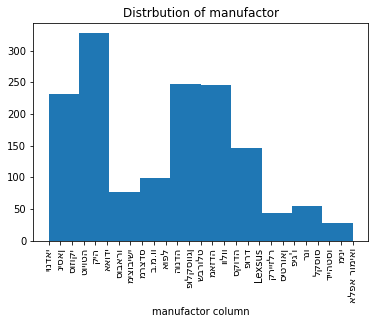

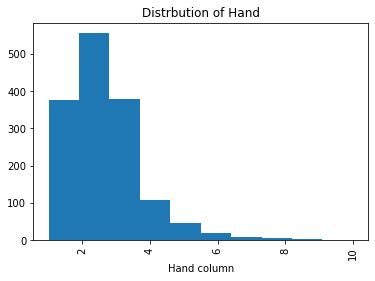

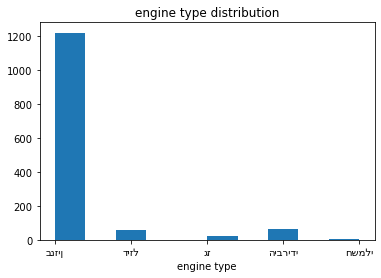

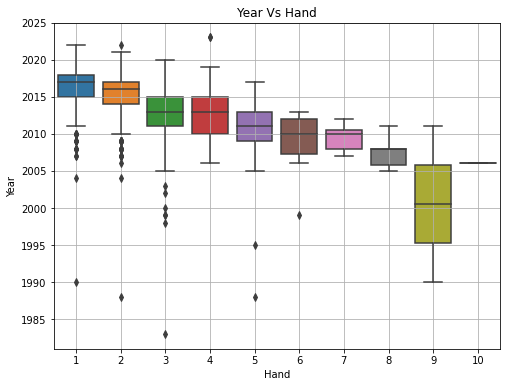

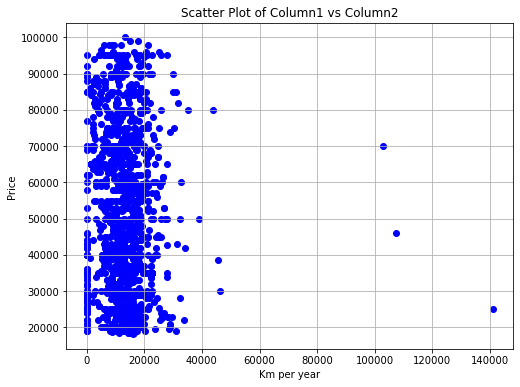

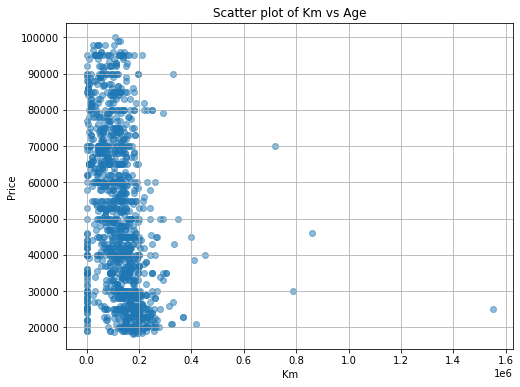

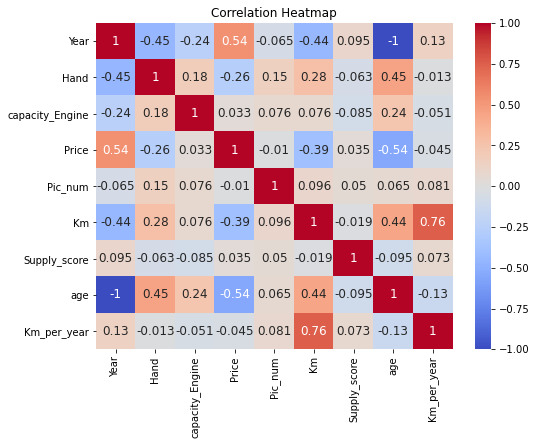

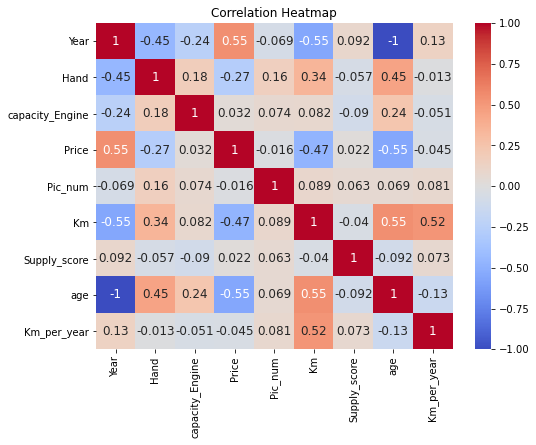

  Column 1 Column 2  Chi2 Statistic       P-value
0     Gear    model     1284.983432  1.911746e-51


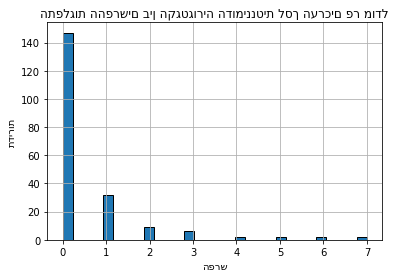

      Column 1 Column 2  Chi2 Statistic        P-value
0  Engine_type    model     3373.476517  9.197593e-312


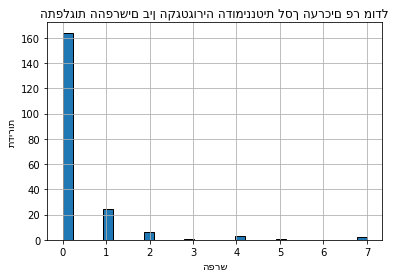

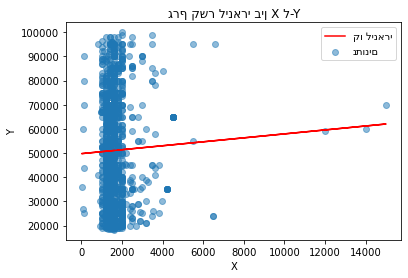

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1293 non-null   object 
 1   Year             1293 non-null   int64  
 2   model            1293 non-null   object 
 3   Hand             1293 non-null   int64  
 4   Gear             1293 non-null   object 
 5   capacity_Engine  1293 non-null   float64
 6   Engine_type      1293 non-null   object 
 7   Prev_ownership   591 non-null    object 
 8   Curr_ownership   593 non-null    object 
 9   Area             1158 non-null   object 
 10  City             1293 non-null   object 
 11  Price            1293 non-null   float64
 12  Pic_num          1272 non-null   float64
 13  Cre_date         1253 non-null   object 
 14  Repub_date       1253 non-null   object 
 15  Description      1293 non-null   object 
 16  Color            593 non-null    object 
 17  Km            

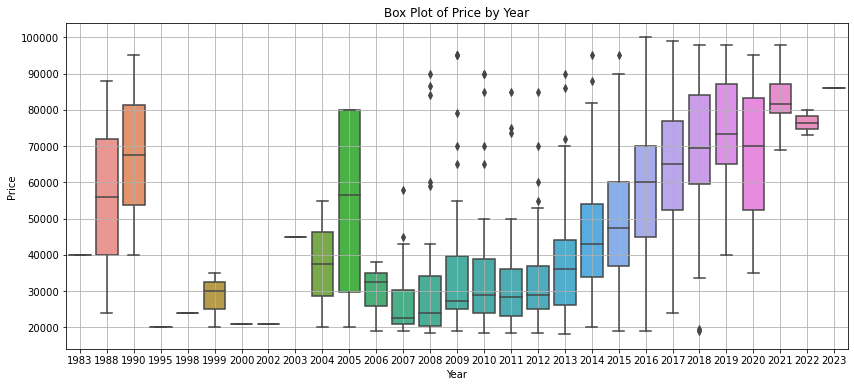

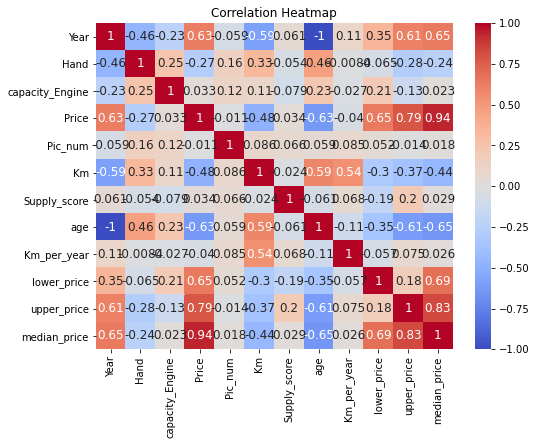

In [13]:
df=pd.read_csv('dataset.csv')
df=prepare_data(df)
df.to_csv('output_finish.csv', index=False)

In [3]:
df.columns

Index(['manufactor', 'Year', 'model', 'Hand', 'Gear', 'capacity_Engine',
       'Engine_type', 'Prev_ownership', 'Curr_ownership', 'Area', 'City',
       'Price', 'Pic_num', 'Cre_date', 'Repub_date', 'Description', 'Color',
       'Km', 'Test', 'Supply_score', 'age', 'Km_per_year', 'Year_Group',
       'lower_price', 'upper_price', 'median_price', 'Km_group'],
      dtype='object')

## המודל שלנו

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings

# הורדת כל האזהרות
warnings.filterwarnings('ignore')

# קריאת הנתונים
df = df.dropna(subset=['Price'])

# שמירת האינדקס המקורי
df['original_index'] = df.index

features = ['Km_group', 'model', 'Year', 'Year_Group', 'manufactor']
X = df[features]
y = df['Price']

# קידוד משתנים קטגוריאליים
X_encoded = pd.get_dummies(X, drop_first=True)

# שמירת שמות העמודות המקוריים
column_names = X_encoded.columns

# נרמול מאפיינים
scaler = StandardScaler()
X_encoded = scaler.fit_transform(X_encoded)

# פיצול הנתונים
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X_encoded, y, df['original_index'], test_size=0.2, random_state=1)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse, predictions

# Elastic Net עם כוונון היפר-פרמטרים
elastic_net = ElasticNet(positive=True)
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]
}
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_elastic_net = grid_search.best_estimator_

# הצגת היפר-פרמטרים שנבחרו
print(f"Best alpha: {best_elastic_net.alpha}")
print(f"Best l1_ratio: {best_elastic_net.l1_ratio}")

# חיזוי הערכים
y_pred = best_elastic_net.predict(X_test)

# הבטחת שהתחזיות הן חיוביות בלבד מכיוון שמדובר על מחיר
y_pred = np.maximum(y_pred, 0)


# קרוס ולידציה עם 10 חלקים על הנתונים 
cv_scores_cleaned = cross_val_score(best_elastic_net, X_encoded, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores_cleaned = np.sqrt(-cv_scores_cleaned)

# חישוב השפעת המאפיינים המקוריים
coefs = best_elastic_net.coef_
coefs_dict = dict(zip(column_names, coefs))

# חישוב ההשפעה עבור העמודות המקוריות
feature_importance = {}
for feature in features:
    impact_sum = sum(value for key, value in coefs_dict.items() if key.startswith(feature))
    feature_importance[feature] = impact_sum

# הוספת כיוון ההשפעה
feature_impact = {feature: 'חיובי' if importance > 0 else 'שלילי' for feature, importance in feature_importance.items()}

# הצגת התוצאות
for feature, impact in feature_impact.items():
    print(f'Feature: {feature}, Impact: {impact}, Importance: {feature_importance[feature]:.4f}')

print(f'Elastic Net Cross-validated RMSE on cleaned data: {cv_rmse_scores_cleaned.mean():.4f} ± {cv_rmse_scores_cleaned.std():.4f}')

print(y_pred.min())



Best alpha: 100.0
Best l1_ratio: 1.0
Feature: Km_group, Impact: חיובי, Importance: 6138.6436
Feature: model, Impact: חיובי, Importance: 121275.9511
Feature: Year, Impact: חיובי, Importance: 21046.6168
Feature: Year_Group, Impact: חיובי, Importance: 8236.4161
Feature: manufactor, Impact: חיובי, Importance: 44222.1391
Elastic Net Cross-validated RMSE on cleaned data: 11567.0556 ± 1578.3010
9347.600117725837
